In [1]:
# setting up everything
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import glob
import seaborn as sns
import os
# from scipy.ndimage.interpolation import shift
# from scipy.signal import savgol_filter

from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from matplotlib import path

from matplotlib import cm
%matplotlib inline

In [2]:
casedate0 = '20150609'
LASSOPath = 'E:/Data/SGP_LASSO/WRF/*' + casedate0 + '.000000/raw_model/'

tmp = glob.glob(LASSOPath + '*_20_*nc')
filename = tmp[0]
f = xr.open_dataset(filename)

In [3]:
tmp

['E:/Data/SGP_LASSO/WRF\\sgplassodiagraw3C1.m1.20150609.000000\\raw_model\\wrfout_d01_2015-06-09_20_00_00.nc']

In [252]:
f

<xarray.Dataset>
Dimensions:                (Time: 6, aer_layers: 401, bottom_top: 226, bottom_top_stag: 227, force_layers: 751, soil_layers_stag: 5, south_north: 144, south_north_stag: 145, west_east: 144, west_east_stag: 145)
Coordinates:
    XLAT                   (Time, south_north, west_east) float32 ...
    XLONG                  (Time, south_north, west_east) float32 ...
    XTIME                  (Time) datetime64[ns] ...
    XLAT_U                 (Time, south_north, west_east_stag) float32 ...
    XLONG_U                (Time, south_north, west_east_stag) float32 ...
    XLAT_V                 (Time, south_north_stag, west_east) float32 ...
    XLONG_V                (Time, south_north_stag, west_east) float32 ...
Dimensions without coordinates: Time, aer_layers, bottom_top, bottom_top_stag, force_layers, soil_layers_stag, south_north, south_north_stag, west_east, west_east_stag
Data variables:
    Times                  (Time) |S19 ...
    LU_INDEX               (Time, south_north, west_east) float32 ...
    ZNU                    (Time, bottom_top) float32 ...
    ZNW                    (Time, bottom_top_stag) float32 ...
    ZS                     (Time, soil_layers_stag) float32 ...
    DZS                    (Time, soil_layers_stag) float32 ...
    VAR_SSO                (Time, south_north, west_east) float32 ...
    U                      (Time, bottom_top, south_north, west_east_stag) float32 ...
    V                      (Time, bottom_top, south_north_stag, west_east) float32 ...
    W                      (Time, bottom_top_stag, south_north, west_east) float32 ...
    PH                     (Time, bottom_top_stag, south_north, west_east) float32 ...
    PHB                    (Time, bottom_top_stag, south_north, west_east) float32 ...
    T                      (Time, bottom_top, south_north, west_east) float32 ...
    HFX_FORCE              (Time) float32 ...
    LH_FORCE               (Time) float32 ...
    TSK_FORCE              (Time) float32 ...
    HFX_FORCE_TEND         (Time) float32 ...
    LH_FORCE_TEND          (Time) float32 ...
    TSK_FORCE_TEND         (Time) float32 ...
    MU                     (Time, south_north, west_east) float32 ...
    MUB                    (Time, south_north, west_east) float32 ...
    NEST_POS               (Time, south_north, west_east) float32 ...
    TKE                    (Time, bottom_top, south_north, west_east) float32 ...
    P                      (Time, bottom_top, south_north, west_east) float32 ...
    ALT                    (Time, bottom_top, south_north, west_east) float32 ...
    PB                     (Time, bottom_top, south_north, west_east) float32 ...
    FNM                    (Time, bottom_top) float32 ...
    FNP                    (Time, bottom_top) float32 ...
    RDNW                   (Time, bottom_top) float32 ...
    RDN                    (Time, bottom_top) float32 ...
    DNW                    (Time, bottom_top) float32 ...
    DN                     (Time, bottom_top) float32 ...
    CFN                    (Time) float32 ...
    CFN1                   (Time) float32 ...
    THIS_IS_AN_IDEAL_RUN   (Time) int32 ...
    P_HYD                  (Time, bottom_top, south_north, west_east) float32 ...
    Q2                     (Time, south_north, west_east) float32 ...
    T2                     (Time, south_north, west_east) float32 ...
    TH2                    (Time, south_north, west_east) float32 ...
    PSFC                   (Time, south_north, west_east) float32 ...
    U10                    (Time, south_north, west_east) float32 ...
    V10                    (Time, south_north, west_east) float32 ...
    RDX                    (Time) float32 ...
    RDY                    (Time) float32 ...
    RESM                   (Time) float32 ...
    ZETATOP                (Time) float32 ...
    CF1                    (Time) float32 ...
    CF2                    (Time) float32 ...
    CF3                    (Time) float32 ...
    ITIMEST

In [4]:
ind_zcb = 79

wplt = f['W'].values[0, ind_zcb, :,:]
qlplt = 1000.*f['QCLOUD'].values[0, ind_zcb, :,:]

nx = 144
ny = 144
x = np.linspace(0, 14.3, nx)
y = np.linspace(0, 14.3, ny)

myfontsize = 20

In [5]:
tkeplt_tmp = f['TKE'].values[0, 0:ind_zcb, :,:]
tkeplt = tkeplt_tmp.mean(axis=0)

C:\Users\Youtong Zheng\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Youtong Zheng\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


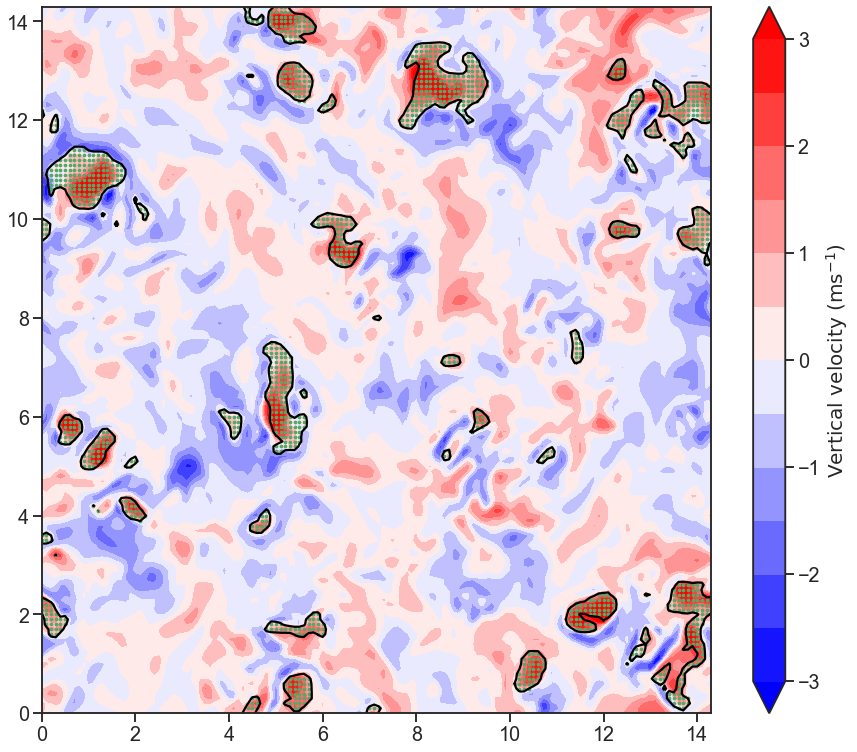

In [6]:
sns.set(context="talk", style="ticks", font_scale=1.2)

fig, axs = plt.subplots(1,1,figsize=[15, 13])

cmin = -3.
cmax = 3.

oax = axs.contourf(x,y,wplt, cmap = cm.bwr, levels = np.linspace(cmin, cmax, 13), vmin = cmin, vmax = cmax, extend='both')
oax1 = axs.contour(x,y,qlplt, colors = 'black', levels = [0.1])

cbar = fig.colorbar(oax,  ax = axs, orientation='vertical')
cbar.set_label(r"$\mathrm{Vertical \ velocity \ (ms^{-1})}$", fontsize=myfontsize)

dat0= oax1.allsegs[0][:]
npoly = len(dat0)

wcb_single_plt = np.zeros(npoly)
tke_single_plt = np.zeros(npoly)
area_single_plt = np.zeros(npoly)

xv, yv = np.meshgrid(x, y)

for ipo in range(npoly):
    tmp = dat0[ipo]
    polygon = path.Path(tmp)
    
    flags = polygon.contains_points(np.hstack((xv.flatten()[:,np.newaxis],yv.flatten()[:,np.newaxis])))
    grid = np.zeros((nx,ny),dtype='bool')
#     grid[(np.round(((xv.flatten()-first)/size))).astype('int'),(np.round(((yv.flatten()-first)/size))).astype('int')] = flags
    grid[(np.round((10.*xv.flatten()))).astype('int'),(np.round(10.*(yv.flatten()))).astype('int')] = flags
    grid = grid.T
    tmp = wplt[grid]
    tmp = tmp[tmp > 0.]
    
    wcb_single_plt[ipo] = np.mean(tmp)
    area_single_plt[ipo] = len(tmp)
    tmp = tkeplt[grid]
    tke_single_plt[ipo] = np.mean(tkeplt[grid])
    
#     print(len(tmp), np.mean(wplt[grid]))

    axs.scatter(xv[grid],yv[grid], color = 'g', s = 20, marker ='.')

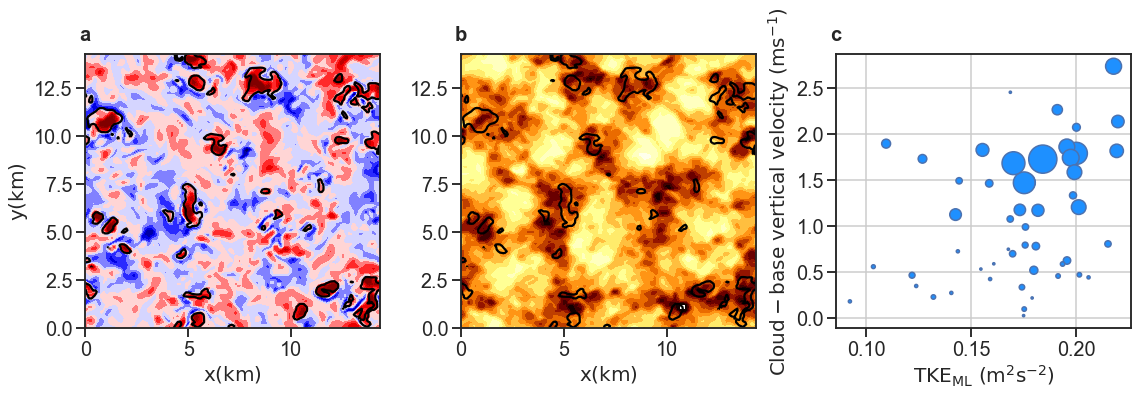

In [9]:
sns.set(context="talk", style="ticks", font_scale=1.2)

fig, axs = plt.subplots(1,3,figsize=[16, 5])

fig.tight_layout(w_pad=1., h_pad=2.5)

#fig1
cmin = -3.
cmax = 3.

axw = axs[0].contourf(x,y,wplt, cmap = cm.seismic, levels = np.linspace(cmin, cmax, 13), vmin = cmin, vmax = cmax, extend='both')
axq = axs[0].contour(x,y,qlplt, colors = 'black', levels = [0.1])

axs[0].set_xlabel(r"$\mathrm{x (km)}$", fontsize=myfontsize)
axs[0].set_ylabel(r"$\mathrm{y (km)}$", fontsize=myfontsize)

# cbar = fig.colorbar(axw,  ax = axs[0], orientation='vertical')
# cbar.set_label(r"$\mathrm{Vertical \ velocity \ (ms^{-1})}$", fontsize=myfontsize)

#fig2
cmin = 0
cmax = 0.3

axtke = axs[1].contourf(x,y,tkeplt, cmap = cm.afmhot_r, levels = np.linspace(cmin, cmax, 13), vmin = cmin, vmax = cmax)
axq1 = axs[1].contour(x,y,qlplt, colors = 'black', levels = [0.1])

axs[1].set_xlabel(r"$\mathrm{x (km)}$", fontsize=myfontsize)

# cbar = fig.colorbar(axtke,  ax = axs[1], orientation='vertical')
# cbar.set_label(r"$\mathrm{TKE \ (m^2s^{-2})}$", fontsize=myfontsize)

#fig3
axs[2].scatter(tke_single_plt, wcb_single_plt, s = 5.*area_single_plt, c = 'dodgerblue',edgecolors='b')

axs[2].set_xlabel(r"$\mathrm{TKE_{ML} \ (m^2s^{-2})}$", fontsize=myfontsize)
axs[2].set_ylabel(r"$\mathrm{Cloud-base \ vertical \ velocity \ (ms^{-1})}$", fontsize=myfontsize)
axs[2].grid(True)

for i, label in enumerate(('a', 'b', 'c')):
    axs[i].text(-0.02, 1.05, label, transform=axs[i].transAxes,fontsize=myfontsize, fontweight='bold')

# cbar = fig.colorbar(axw,  ax=axs[0], orientation='horizontal', shrink=0.6, pad=0.3)
# cbar.set_label(r"$\mathrm{Vertical \ velocity \ (ms^{-1})}$", fontsize=myfontsize)


# cbar = fig.colorbar(axtke,  ax=axs[1], orientation='horizontal', ticks = [0., 0.1, 0.2, 0.3],shrink=0.6, pad=0.3)
# cbar.set_label(r"$\mathrm{TKE_{ML} \ (m^2s^{-2})}$", fontsize=myfontsize)

In [49]:
from scipy.stats import pearsonr
corr, _ = pearsonr(tke_single_plt, wcb_single_plt)
print(corr)

ind = np.where(area_single_plt > 10)
corr, _ = pearsonr(tke_single_plt[ind], wcb_single_plt[ind])
print(corr)

ValueError: array must not contain infs or NaNs